## Sea surface temperature in different simulations

In [18]:
import xarray as xr
import numpy as np
import glob
import cmocean
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/users/birgal/')

In [19]:
base_dir    = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
ens1011_dir = f'{base_dir}output/CESM2_tune0_ens1011/files0/'
era5_dir    = f'{base_dir}output/ERA5_test6/files/' 

In [21]:
cesm2 = xr.open_mfdataset(f'{ens1011_dir}*grid_T*.nc')
cesm2 = cesm2.isel(time_counter=((cesm2.time_counter.dt.year <= 2015) * (cesm2.time_counter.dt.year >= 1979))).groupby('time_counter.month').mean('time_counter')

In [20]:
era5 = xr.open_mfdataset(f'{era5_dir}*grid_T*.nc')
era5 = era5.isel(time_counter=((era5.time_counter.dt.year <= 2015) * (era5.time_counter.dt.year >= 1979))).groupby('time_counter.month').mean('time_counter')

0
1
2
3
4
5
6
7
8
9
10
11


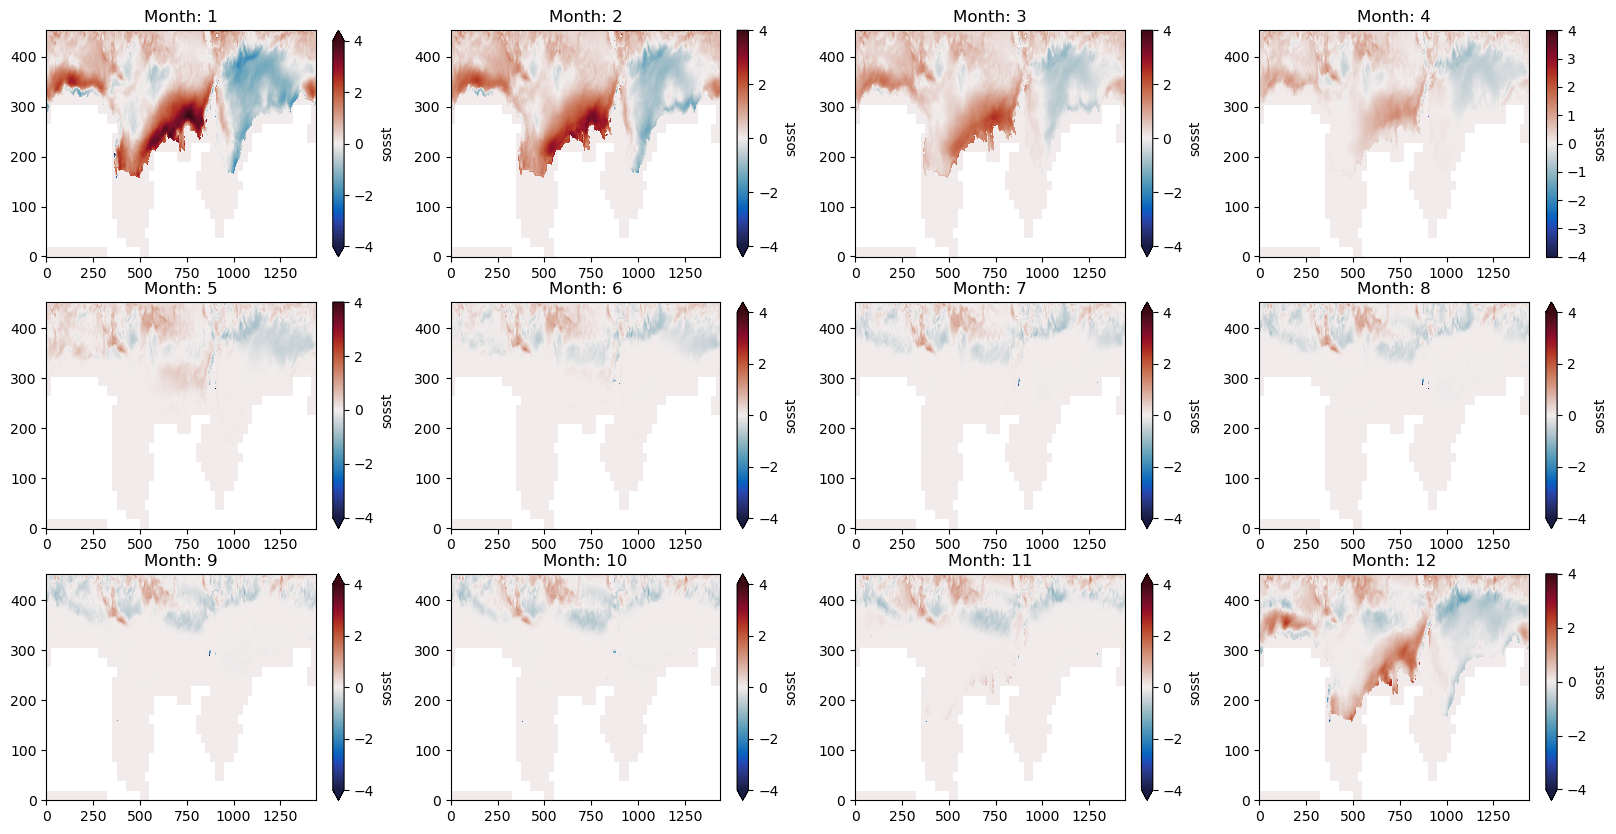

In [27]:
fig, ax = plt.subplots(3,4, figsize=(20,10))

for a, axis in enumerate(ax.ravel()):
    print(a)
    (cesm2.sosst.isel(month=a) - era5.sosst.isel(month=a)).plot(ax=axis, vmin=-4, vmax=4, cmap=cmocean.cm.balance)
    axis.set_title(f'Month: {a+1}')
    axis.set_xlabel(''); axis.set_ylabel('');[4]